# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [1]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [2]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.sparse import hstack
    
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*50)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [5]:
import pickle

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Encoding essay with tfidf

vectorizer_tfidf = TfidfVectorizer(min_df=10)
vectorizer_tfidf.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer_tfidf.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

print("="*50)


(49041, 12149) (49041,)
(24155, 12149) (24155,)
(36052, 12149) (36052,)


In [10]:
def getTransformed(preprocessed_data, vectorizer_tfidf_w2v):
    dictionary = dict(zip(vectorizer_tfidf_w2v.get_feature_names(), list(vectorizer_tfidf_w2v.idf_)))
    tfidf_w2v_words = set(vectorizer_tfidf_w2v.get_feature_names())
    
    tfidf_w2v_vec = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight = 0 # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_w2v_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vec.append(vector)
    
    return tfidf_w2v_vec


In [12]:
# Encoding essay with tfidf-W2V

vectorizer_tfidf_w2v = TfidfVectorizer()
vectorizer_tfidf_w2v.fit(X_train['essay'].values)

X_train_essay_tfidf_w2v = getTransformed(X_train['essay'].values, vectorizer_tfidf_w2v)
X_cv_essay_tfidf_w2v = getTransformed(X_cv['essay'].values, vectorizer_tfidf_w2v)
X_test_essay_tfidf_w2v = getTransformed(X_test['essay'].values, vectorizer_tfidf_w2v)

# print(X_train_essay_tfidf_w2v.shape, y_train.shape)
# print(X_cv_essay_tfidf_w2v.shape, y_cv.shape)
# print(X_test_essay_tfidf_w2v.shape, y_test.shape)

# print("="*50)



  0%|          | 0/49041 [00:00<?, ?it/s]

  0%|          | 42/49041 [00:00<01:58, 414.03it/s]

  0%|          | 87/49041 [00:00<01:55, 423.01it/s]

  0%|          | 135/49041 [00:00<01:51, 438.30it/s]

  0%|          | 186/49041 [00:00<01:46, 457.18it/s]

  0%|          | 245/49041 [00:00<01:40, 487.51it/s]

  1%|          | 300/49041 [00:00<01:36, 503.97it/s]

  1%|          | 347/49041 [00:00<01:40, 486.18it/s]

  1%|          | 393/49041 [00:00<01:42, 472.62it/s]

  1%|          | 452/49041 [00:00<01:36, 502.25it/s]

  1%|          | 503/49041 [00:01<01:36, 504.52it/s]

  1%|          | 553/49041 [00:01<01:37, 497.49it/s]

  1%|          | 605/49041 [00:01<01:36, 502.47it/s]

  1%|▏         | 656/49041 [00:01<01:36, 500.43it/s]

  1%|▏         | 707/49041 [00:01<01:36, 502.35it/s]

  2%|▏         | 758/49041 [00:01<01:36, 497.97it/s]

  2%|▏         | 808/49041 [00:01<01:38, 490.39it/s]

  2%|▏         | 858/49041 [00:01<01:39, 484.29it/s]

  2%|▏         | 915/49041 [00:01<01:34

 28%|██▊       | 13856/49041 [00:28<01:05, 537.26it/s]

 28%|██▊       | 13910/49041 [00:29<01:08, 511.09it/s]

 28%|██▊       | 13965/49041 [00:29<01:07, 521.16it/s]

 29%|██▊       | 14018/49041 [00:29<01:06, 523.37it/s]

 29%|██▊       | 14071/49041 [00:29<01:06, 522.06it/s]

 29%|██▉       | 14124/49041 [00:29<01:07, 514.94it/s]

 29%|██▉       | 14176/49041 [00:29<01:08, 511.31it/s]

 29%|██▉       | 14231/49041 [00:29<01:06, 521.60it/s]

 29%|██▉       | 14284/49041 [00:29<01:08, 510.55it/s]

 29%|██▉       | 14336/49041 [00:29<01:08, 503.24it/s]

 29%|██▉       | 14387/49041 [00:30<01:18, 440.81it/s]

 29%|██▉       | 14433/49041 [00:30<01:21, 424.22it/s]

 30%|██▉       | 14477/49041 [00:30<01:28, 388.96it/s]

 30%|██▉       | 14519/49041 [00:30<01:26, 397.77it/s]

 30%|██▉       | 14562/49041 [00:30<01:25, 405.19it/s]

 30%|██▉       | 14613/49041 [00:30<01:19, 431.36it/s]

 30%|██▉       | 14665/49041 [00:30<01:15, 454.22it/s]

 30%|███       | 14720/49041 [00:30<01:11, 478.0

 55%|█████▌    | 27188/49041 [00:57<00:51, 427.56it/s]

 56%|█████▌    | 27238/49041 [00:57<00:48, 446.02it/s]

 56%|█████▌    | 27287/49041 [00:57<00:47, 457.18it/s]

 56%|█████▌    | 27334/49041 [00:57<00:47, 458.39it/s]

 56%|█████▌    | 27385/49041 [00:57<00:45, 471.74it/s]

 56%|█████▌    | 27437/49041 [00:57<00:44, 482.40it/s]

 56%|█████▌    | 27486/49041 [00:57<00:48, 448.13it/s]

 56%|█████▌    | 27532/49041 [00:58<00:50, 428.44it/s]

 56%|█████▌    | 27583/49041 [00:58<00:47, 447.72it/s]

 56%|█████▋    | 27629/49041 [00:58<00:47, 451.27it/s]

 56%|█████▋    | 27676/49041 [00:58<00:46, 454.98it/s]

 57%|█████▋    | 27728/49041 [00:58<00:45, 470.18it/s]

 57%|█████▋    | 27776/49041 [00:58<00:45, 468.55it/s]

 57%|█████▋    | 27825/49041 [00:58<00:44, 473.71it/s]

 57%|█████▋    | 27877/49041 [00:58<00:43, 484.07it/s]

 57%|█████▋    | 27936/49041 [00:58<00:41, 509.73it/s]

 57%|█████▋    | 27988/49041 [00:58<00:42, 489.97it/s]

 57%|█████▋    | 28040/49041 [00:59<00:42, 497.7

 83%|████████▎ | 40625/49041 [01:25<00:17, 489.96it/s]

 83%|████████▎ | 40676/49041 [01:25<00:16, 494.82it/s]

 83%|████████▎ | 40732/49041 [01:25<00:16, 512.51it/s]

 83%|████████▎ | 40787/49041 [01:25<00:15, 520.97it/s]

 83%|████████▎ | 40840/49041 [01:25<00:16, 501.02it/s]

 83%|████████▎ | 40891/49041 [01:25<00:16, 499.55it/s]

 83%|████████▎ | 40942/49041 [01:25<00:16, 485.42it/s]

 84%|████████▎ | 40991/49041 [01:26<00:16, 484.01it/s]

 84%|████████▎ | 41047/49041 [01:26<00:15, 504.17it/s]

 84%|████████▍ | 41102/49041 [01:26<00:15, 515.47it/s]

 84%|████████▍ | 41160/49041 [01:26<00:14, 532.59it/s]

 84%|████████▍ | 41214/49041 [01:26<00:14, 526.90it/s]

 84%|████████▍ | 41267/49041 [01:26<00:15, 505.82it/s]

 84%|████████▍ | 41318/49041 [01:26<00:15, 495.09it/s]

 84%|████████▍ | 41372/49041 [01:26<00:15, 507.24it/s]

 84%|████████▍ | 41430/49041 [01:26<00:14, 524.06it/s]

 85%|████████▍ | 41483/49041 [01:26<00:15, 494.36it/s]

 85%|████████▍ | 41534/49041 [01:27<00:15, 474.0

 22%|██▏       | 5287/24155 [00:10<00:36, 523.00it/s]

 22%|██▏       | 5340/24155 [00:10<00:36, 515.63it/s]

 22%|██▏       | 5399/24155 [00:10<00:35, 535.58it/s]

 23%|██▎       | 5453/24155 [00:10<00:35, 528.31it/s]

 23%|██▎       | 5510/24155 [00:10<00:34, 538.89it/s]

 23%|██▎       | 5568/24155 [00:10<00:33, 549.71it/s]

 23%|██▎       | 5624/24155 [00:10<00:34, 544.42it/s]

 24%|██▎       | 5679/24155 [00:10<00:35, 526.05it/s]

 24%|██▎       | 5732/24155 [00:11<00:35, 516.39it/s]

 24%|██▍       | 5784/24155 [00:11<00:35, 513.19it/s]

 24%|██▍       | 5836/24155 [00:11<00:35, 509.74it/s]

 24%|██▍       | 5896/24155 [00:11<00:34, 532.88it/s]

 25%|██▍       | 5951/24155 [00:11<00:33, 537.51it/s]

 25%|██▍       | 6011/24155 [00:11<00:32, 554.83it/s]

 25%|██▌       | 6067/24155 [00:11<00:34, 517.33it/s]

 25%|██▌       | 6120/24155 [00:11<00:35, 513.54it/s]

 26%|██▌       | 6175/24155 [00:11<00:34, 523.70it/s]

 26%|██▌       | 6228/24155 [00:12<00:35, 511.48it/s]

 26%|██▌  

 79%|███████▉  | 19065/24155 [00:38<00:10, 484.70it/s]

 79%|███████▉  | 19114/24155 [00:38<00:10, 476.86it/s]

 79%|███████▉  | 19162/24155 [00:38<00:12, 389.17it/s]

 80%|███████▉  | 19204/24155 [00:38<00:13, 369.55it/s]

 80%|███████▉  | 19244/24155 [00:38<00:13, 369.12it/s]

 80%|███████▉  | 19297/24155 [00:39<00:12, 403.31it/s]

 80%|████████  | 19342/24155 [00:39<00:11, 415.02it/s]

 80%|████████  | 19385/24155 [00:39<00:12, 396.54it/s]

 80%|████████  | 19437/24155 [00:39<00:11, 426.31it/s]

 81%|████████  | 19488/24155 [00:39<00:10, 446.83it/s]

 81%|████████  | 19541/24155 [00:39<00:09, 468.40it/s]

 81%|████████  | 19590/24155 [00:39<00:10, 422.92it/s]

 81%|████████▏ | 19634/24155 [00:39<00:11, 403.52it/s]

 81%|████████▏ | 19679/24155 [00:39<00:10, 415.00it/s]

 82%|████████▏ | 19731/24155 [00:40<00:10, 441.08it/s]

 82%|████████▏ | 19783/24155 [00:40<00:09, 461.33it/s]

 82%|████████▏ | 19836/24155 [00:40<00:09, 479.53it/s]

 82%|████████▏ | 19889/24155 [00:40<00:08, 491.9

 24%|██▍       | 8769/36052 [00:17<00:58, 466.26it/s]

 24%|██▍       | 8823/36052 [00:18<00:56, 482.86it/s]

 25%|██▍       | 8878/36052 [00:18<00:54, 495.53it/s]

 25%|██▍       | 8929/36052 [00:18<00:54, 496.96it/s]

 25%|██▍       | 8985/36052 [00:18<00:52, 512.97it/s]

 25%|██▌       | 9037/36052 [00:18<00:53, 507.62it/s]

 25%|██▌       | 9091/36052 [00:18<00:52, 516.83it/s]

 25%|██▌       | 9143/36052 [00:18<00:54, 490.16it/s]

 26%|██▌       | 9202/36052 [00:18<00:52, 514.36it/s]

 26%|██▌       | 9257/36052 [00:18<00:51, 523.42it/s]

 26%|██▌       | 9310/36052 [00:19<00:52, 510.64it/s]

 26%|██▌       | 9365/36052 [00:19<00:51, 521.24it/s]

 26%|██▌       | 9418/36052 [00:19<00:51, 517.96it/s]

 26%|██▋       | 9471/36052 [00:19<00:52, 510.90it/s]

 26%|██▋       | 9527/36052 [00:19<00:50, 523.98it/s]

 27%|██▋       | 9580/36052 [00:19<00:50, 522.37it/s]

 27%|██▋       | 9633/36052 [00:19<00:51, 517.29it/s]

 27%|██▋       | 9685/36052 [00:19<00:51, 510.82it/s]

 27%|██▋  

 63%|██████▎   | 22637/36052 [00:45<00:26, 503.48it/s]

 63%|██████▎   | 22688/36052 [00:45<00:26, 495.94it/s]

 63%|██████▎   | 22745/36052 [00:45<00:25, 515.55it/s]

 63%|██████▎   | 22797/36052 [00:46<00:26, 503.27it/s]

 63%|██████▎   | 22848/36052 [00:46<00:26, 499.90it/s]

 64%|██████▎   | 22902/36052 [00:46<00:25, 508.71it/s]

 64%|██████▎   | 22954/36052 [00:46<00:25, 505.92it/s]

 64%|██████▍   | 23005/36052 [00:46<00:26, 498.10it/s]

 64%|██████▍   | 23056/36052 [00:46<00:26, 497.41it/s]

 64%|██████▍   | 23110/36052 [00:46<00:25, 507.67it/s]

 64%|██████▍   | 23161/36052 [00:46<00:26, 484.81it/s]

 64%|██████▍   | 23216/36052 [00:46<00:25, 501.58it/s]

 65%|██████▍   | 23267/36052 [00:47<00:25, 500.59it/s]

 65%|██████▍   | 23318/36052 [00:47<00:25, 500.35it/s]

 65%|██████▍   | 23373/36052 [00:47<00:24, 512.43it/s]

 65%|██████▍   | 23430/36052 [00:47<00:23, 526.88it/s]

 65%|██████▌   | 23483/36052 [00:47<00:24, 515.84it/s]

 65%|██████▌   | 23539/36052 [00:47<00:23, 527.6

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [13]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    
# Encoding categorical features with bow

vectorizer1 = TfidfVectorizer()
vectorizer1.fit(X_train['school_state'].values)

X_train_state = vectorizer1.transform(X_train['school_state'].values)
X_cv_state = vectorizer1.transform(X_cv['school_state'].values)
X_test_state = vectorizer1.transform(X_test['school_state'].values)

print(X_train_state.shape, y_train.shape)
print(X_cv_state.shape, y_cv.shape)
print(X_test_state.shape, y_test.shape)

print("="*50)

vectorizer2 = TfidfVectorizer()
vectorizer2.fit(X_train['teacher_prefix'].values)

X_train_teacher_prefix = vectorizer2.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix = vectorizer2.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer2.transform(X_test['teacher_prefix'].values)

print(X_train_teacher_prefix.shape, y_train.shape)
print(X_cv_teacher_prefix.shape, y_cv.shape)
print(X_test_teacher_prefix.shape, y_test.shape)

print("="*50)

vectorizer3 = TfidfVectorizer()
vectorizer3.fit(X_train['project_grade_category'].values)

X_train_project_grade = vectorizer3.transform(X_train['project_grade_category'].values)
X_cv_project_grade = vectorizer3.transform(X_cv['project_grade_category'].values)
X_test_project_grade = vectorizer3.transform(X_test['project_grade_category'].values)

print(X_train_project_grade.shape, y_train.shape)
print(X_cv_project_grade.shape, y_cv.shape)
print(X_test_project_grade.shape, y_test.shape)

print("="*50)

vectorizer4 = TfidfVectorizer()
vectorizer4.fit(X_train['clean_categories'].values)

X_train_clean_cat = vectorizer4.transform(X_train['clean_categories'].values)
X_cv_clean_cat = vectorizer4.transform(X_cv['clean_categories'].values)
X_test_clean_cat = vectorizer4.transform(X_test['clean_categories'].values)

print(X_train_clean_cat.shape, y_train.shape)
print(X_cv_clean_cat.shape, y_cv.shape)
print(X_test_clean_cat.shape, y_test.shape)

print("="*50)

vectorizer5 = TfidfVectorizer()
vectorizer5.fit(X_train['clean_subcategories'].values)

X_train_clean_subcat = vectorizer5.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcat = vectorizer5.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcat = vectorizer5.transform(X_test['clean_subcategories'].values)

print(X_train_clean_subcat.shape, y_train.shape)
print(X_cv_clean_subcat.shape, y_cv.shape)
print(X_test_clean_subcat.shape, y_test.shape)

print("="*100)

# Encoding numberical features

normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_previously_posted = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_previously_posted = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_previously_posted = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(X_train_teacher_previously_posted.shape, y_train.shape)
print(X_cv_teacher_previously_posted.shape, y_cv.shape)
print(X_test_teacher_previously_posted.shape, y_test.shape)

print("="*50)

normalizer1 = Normalizer()
normalizer1.fit(X_train['price'].values.reshape(-1,1))

X_train_price = normalizer1.transform(X_train['price'].values.reshape(-1,1))
X_cv_price = normalizer1.transform(X_cv['price'].values.reshape(-1,1))
X_test_price = normalizer1.transform(X_test['price'].values.reshape(-1,1))

print(X_train_price.shape, y_train.shape)
print(X_cv_price.shape, y_cv.shape)
print(X_test_price.shape, y_test.shape)

print("="*100)


(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [14]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
#SET 1
    
X_train_tfidf = hstack((X_train_state, X_train_teacher_prefix, X_train_project_grade, X_train_teacher_previously_posted, X_train_clean_cat, X_train_clean_subcat, X_train_price, X_train_essay_tfidf)).tocsr()

X_test_tfidf = hstack((X_test_state, X_test_teacher_prefix, X_test_project_grade, X_test_teacher_previously_posted, X_test_clean_cat, X_test_clean_subcat, X_test_price, X_test_essay_tfidf)).tocsr()

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

print("="*100)


#SET 2

X_train_tfidf_w2v = hstack((X_train_state, X_train_teacher_prefix, X_train_project_grade, X_train_teacher_previously_posted, X_train_clean_cat, X_train_clean_subcat, X_train_price, X_train_essay_tfidf_w2v)).tocsr()

X_test_tfidf_w2v = hstack((X_test_state, X_test_teacher_prefix, X_test_project_grade, X_test_teacher_previously_posted, X_test_clean_cat, X_test_clean_subcat, X_test_price, X_test_essay_tfidf_w2v)).tocsr()

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

print("="*100)


(49041, 12250)
(36052, 12250)
(49041, 12250)
(36052, 12250)


In [68]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 

def plotWordCloud(FP):
    
  
    comment_words = '' 
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in FP: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+ " "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [70]:
def plotBloxPlot(FP):
    plt.boxplot(FP)
    plt.title('PRICE in False Positives')
    plt.ylabel('Price')
    plt.grid()
    plt.show()

In [72]:
import seaborn as sns
def plotPDF(FP):
    plt.figure(figsize=(10,3))
    sns.distplot(FP)
    plt.title('PDF for False Positives')
    plt.xlabel('Teacher number who previously posted projects')
    plt.legend()
    plt.show()

In [16]:
from sklearn import tree

max_depth = [1, 5, 10, 50]
min_samples_split = [5, 10, 100, 500]

params = {'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

dtree = tree.DecisionTreeClassifier(class_weight='balanced')
model = GridSearchCV(dtree, params, cv=3, scoring='roc_auc', return_train_score=True)
model.fit(X_train_tfidf, y_train)

train_auc = model.cv_results_['mean_train_score']
test_auc = model.cv_results_['mean_test_score']
best_max_depth = model.best_params_['max_depth']
best_min_samples_split = model.best_params_['min_samples_split']

print(train_auc)
print(test_auc)
print(best_max_depth, best_min_samples_split)

[0.55605191 0.55605191 0.55605191 0.55605191 0.63483751 0.63482553
 0.63398265 0.63243683 0.73644904 0.73477647 0.71728365 0.69618279
 0.98699531 0.98159819 0.92253694 0.81931412]
[0.55487935 0.55487935 0.55487935 0.55487935 0.60311956 0.60299799
 0.60295564 0.60313356 0.60759829 0.60574445 0.60878332 0.61677467
 0.5416558  0.54662401 0.5625226  0.59981432]
10 500


In [88]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

trace1 = go.Scatter3d(x=min_samples_split,y=max_depth,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=min_samples_split,y=max_depth,z=test_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='X'),
        yaxis = dict(title='Y'),
        zaxis = dict(title='Z')))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [18]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

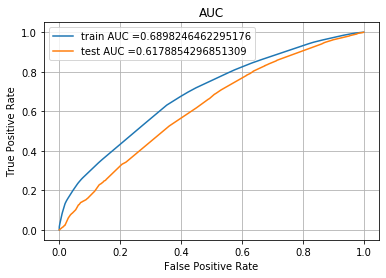

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

dtree1 = tree.DecisionTreeClassifier(class_weight='balanced', min_samples_split=best_min_samples_split, max_depth=best_max_depth)
dtree1.fit(X_train_tfidf, y_train)

# y_train_pred = dtree1.predict_proba(X_train_tfidf)[:,1]
# y_test_pred = dtree1.predict_proba(x_test_tfidf)[:,1]
y_train_pred = batch_predict(dtree1, X_train_tfidf)    
y_test_pred = batch_predict(dtree1, X_test_tfidf)
predictions_test_1=dtree1.predict(X_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
test_auc_tfidf = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC")
plt.grid()
plt.show()

In [21]:
def predict(proba, threshold, fpr, tpr):
    threshold1 = threshold[np.argmax(tpr*(1-fpr))]
    predictions = []
    for i in proba:
        if i>=threshold1:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [22]:
from sklearn.metrics import confusion_matrix

print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print("="*50)

Test confusion matrix
[[ 3001  2458]
 [11711 18882]]


In [23]:
FP_essay_test_1=[]
FP_price_test_1=[]
FP_previous_posted_test_1=[]
 
FP_test_1=[]
for i in range(len(y_test)):
    if (y_test[i] == 0 and predictions_test_1[i] == 1):
        FP_test_1.append(i)

for i in FP_test_1:
    FP_essay_test_1.append(X_test['essay'].values[i])
    FP_price_test_1.append(X_test['price'].values[i])
    FP_previous_posted_test_1.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

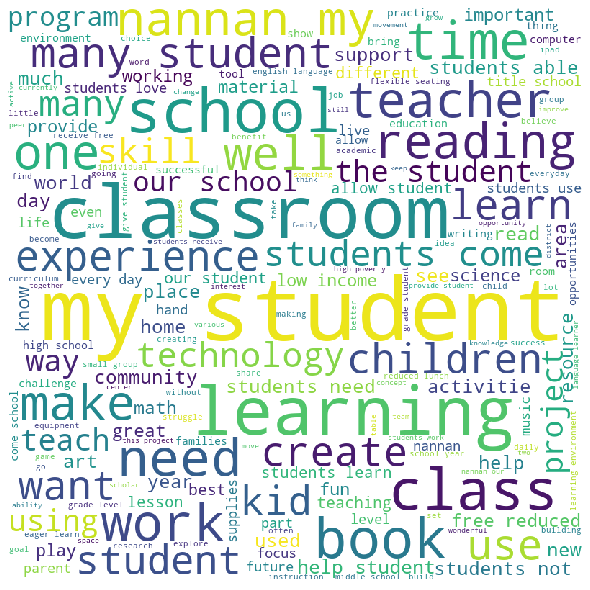

In [69]:
plotWordCloud(FP_essay_test_1)

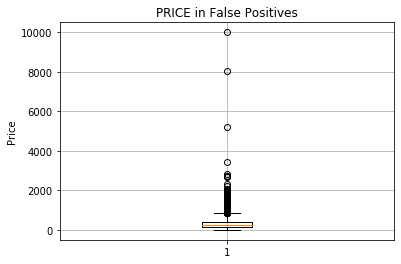

In [71]:
plotBloxPlot(FP_price_test_1)

No handles with labels found to put in legend.


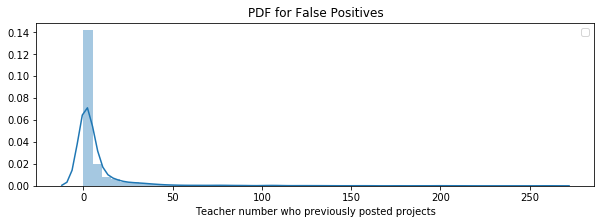

In [73]:
plotPDF(FP_previous_posted_test_1)

In [27]:
#SET 2

dtree_w2v = tree.DecisionTreeClassifier(class_weight='balanced')
model_w2v = GridSearchCV(dtree_w2v, params, cv=3, scoring='roc_auc', return_train_score=True)
model_w2v.fit(X_train_tfidf_w2v, y_train)

train_auc_w2v = model_w2v.cv_results_['mean_train_score']
test_auc_w2v = model_w2v.cv_results_['mean_test_score']
best_max_depth_w2v = model_w2v.best_params_['max_depth']
best_min_samples_split_w2v = model_w2v.best_params_['min_samples_split']

print(train_auc_w2v)
print(test_auc_w2v)
print(best_max_depth_w2v, best_min_samples_split_w2v)


[0.55981245 0.55981245 0.55981245 0.55981245 0.65892432 0.65892432
 0.65885725 0.65783314 0.84143722 0.83951914 0.80000158 0.72886016
 0.9998975  0.99917131 0.90367432 0.74405593]
[0.55151997 0.55151997 0.55151997 0.55151997 0.61238194 0.61231247
 0.61231235 0.61192816 0.57241025 0.57263566 0.58311932 0.60120616
 0.53070693 0.5305271  0.55558905 0.59420648]
5 5


In [89]:
trace1 = go.Scatter3d(x=min_samples_split,y=max_depth,z=train_auc_w2v, name = 'Train')
trace2 = go.Scatter3d(x=min_samples_split,y=max_depth,z=train_auc_w2v, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='X'),
        yaxis = dict(title='Y'),
        zaxis = dict(title='Z')))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

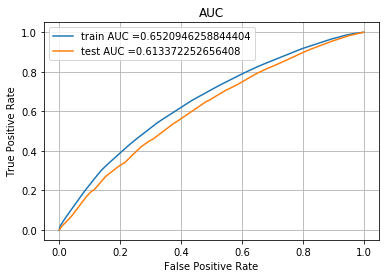

In [66]:
dtree1_w2v = tree.DecisionTreeClassifier(class_weight='balanced', min_samples_split=best_min_samples_split_w2v, max_depth=best_max_depth_w2v)
dtree1_w2v.fit(X_train_tfidf_w2v, y_train)

y_train_pred_w2v = batch_predict(dtree1_w2v, X_train_tfidf_w2v)    
y_test_pred_w2v = batch_predict(dtree1_w2v, X_test_tfidf_w2v)
predictions_test_2 = dtree1_w2v.predict(X_test_tfidf_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_w2v)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_w2v)
test_auc_tfidf_w2v = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC")
plt.grid()
plt.show()

In [45]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_w2v, tr_thresholds, test_fpr, test_tpr)))
print("="*50)

Test confusion matrix
[[ 3337  2122]
 [13737 16856]]


In [46]:
FP_essay_test_2 =[]
FP_price_test_2 =[]
FP_previous_posted_test_2 =[]
 
FP_test_2=[]
for i in range(len(y_test)):
    if (y_test[i] == 0 and predictions_test_2[i] == 1):
        FP_test_2.append(i)

for i in FP_test_2:
    FP_essay_test_2.append(X_test['essay'].values[i])
    FP_price_test_2.append(X_test['price'].values[i])
    FP_previous_posted_test_2.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

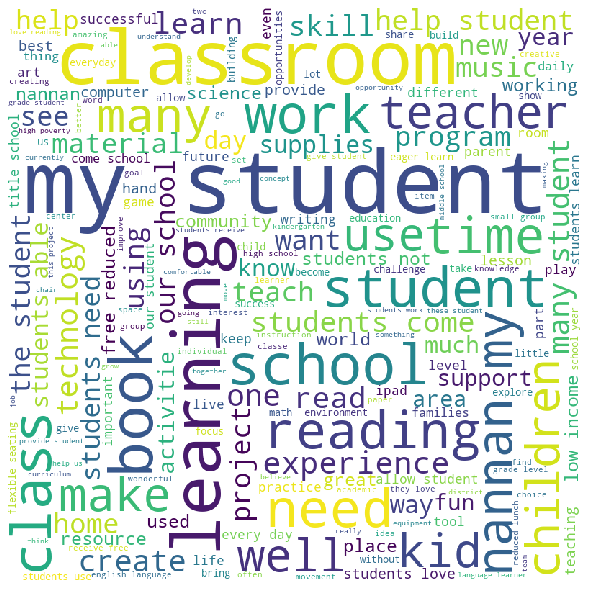

In [74]:
plotWordCloud(FP_essay_test_2)

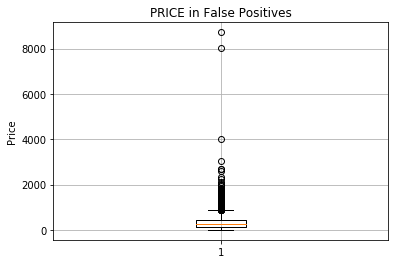

In [75]:
plotBloxPlot(FP_price_test_2)

No handles with labels found to put in legend.


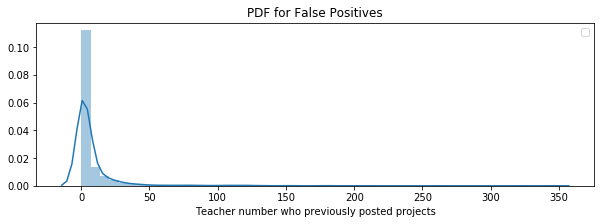

In [76]:
plotPDF(FP_previous_posted_test_2)

<h2>1.6 Getting top features using `feature_importances_`</h2>

In [52]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
tfidf_feature_imp = tree.DecisionTreeClassifier(class_weight='balanced')
tfidf_feature_imp.fit(X_train_tfidf, y_train)

non_zero_features = 0
for i in range (len(tfidf_feature_imp.feature_importances_)):
    if tfidf_feature_imp.feature_importances_[i] > 0:
        non_zero_features += 1

print(non_zero_features)

x_train_tfidf_feature_imp = X_train_tfidf[:, tfidf_feature_imp.feature_importances_.argsort()[::-1][:non_zero_features]]
x_test_tfidf_feature_imp = X_test_tfidf[:, tfidf_feature_imp.feature_importances_.argsort()[::-1][:non_zero_features]]

print(x_train_tfidf_feature_imp.shape)
print(x_test_tfidf_feature_imp.shape)

1857
(49041, 1857)
(36052, 1857)


In [53]:
tfidf_feature_imp_ = tree.DecisionTreeClassifier(class_weight='balanced')

model_feature_imp_ = GridSearchCV(tfidf_feature_imp_, params, cv=3, scoring='roc_auc', return_train_score=True)
model_feature_imp_.fit(X_train_tfidf, y_train)

train_auc_1 = model_feature_imp_.cv_results_['mean_train_score']
test_auc_1 = model_feature_imp_.cv_results_['mean_test_score']
best_min_samples_split_1 = model_feature_imp_.best_params_['min_samples_split']

print(train_auc_1)
print(test_auc_1)
print(best_min_samples_split_1)

[0.55605191 0.55605191 0.55605191 0.55605191 0.63483751 0.63482553
 0.63398265 0.63243683 0.73664755 0.73464213 0.71727668 0.69623703
 0.98649529 0.9809886  0.92182816 0.8177999 ]
[0.55487935 0.55487935 0.55487935 0.55487935 0.60292599 0.60309558
 0.60269959 0.60313356 0.60757823 0.60765057 0.60716581 0.61711039
 0.54534041 0.54358143 0.55988034 0.59904014]
500


In [90]:
trace1 = go.Scatter3d(x=min_samples_split,y=max_depth,z=train_auc_1, name = 'train')
trace2 = go.Scatter3d(x=min_samples_split,y=max_depth,z=test_auc_1, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='X'),
        yaxis = dict(title='Y'),
        zaxis = dict(title='Z')))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

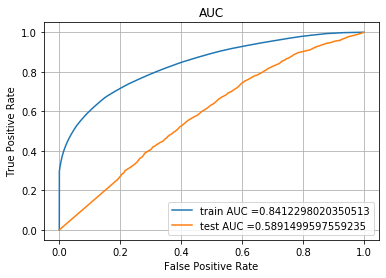

In [58]:
model_feature_imp_1 = tree.DecisionTreeClassifier(class_weight='balanced', min_samples_split=best_min_samples_split, max_depth=None)
model_feature_imp_1.fit(X_train_tfidf, y_train)

y_train_pred1 = batch_predict(model_feature_imp_1, X_train_tfidf)    
y_test_pred1 = batch_predict(model_feature_imp_1, X_test_tfidf)
predictions_test_2 = model_feature_imp_1.predict(X_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC")
plt.grid()
plt.show()

In [59]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred1, tr_thresholds, test_fpr, test_tpr)))
print("="*50)

Test confusion matrix
[[ 3096  2363]
 [13353 17240]]


In [60]:
FP_essay_test_3=[]
FP_price_test_3=[]
FP_previous_posted_test_3=[]
 
FP_test_3=[]
for i in range(len(y_test)):
    if (y_test[i] == 0 and predictions_test_2[i] == 1):
        FP_test_3.append(i)

for i in FP_test_3:
    FP_essay_test_3.append(X_test['essay'].values[i])
    FP_price_test_3.append(X_test['price'].values[i])
    FP_previous_posted_test_3.append(X_test['teacher_number_of_previously_posted_projects'].values[i])

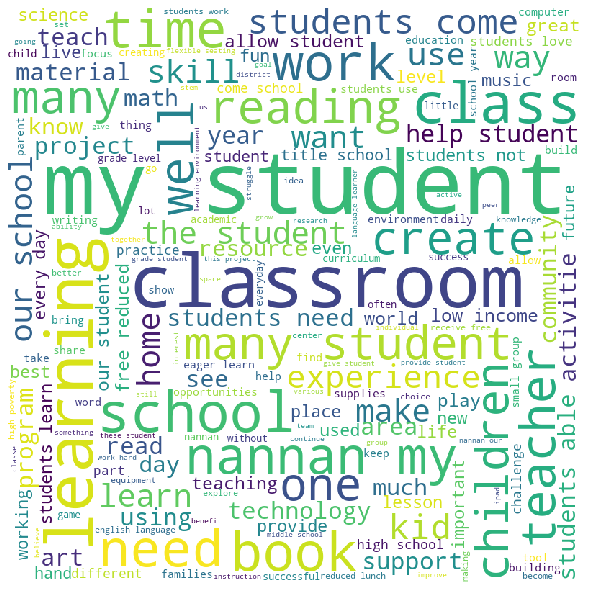

In [80]:
plotWordCloud(FP_essay_test_3)

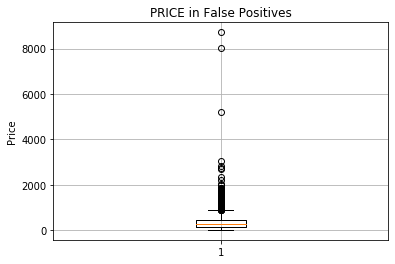

In [79]:
plotBloxPlot(FP_price_test_3)

No handles with labels found to put in legend.


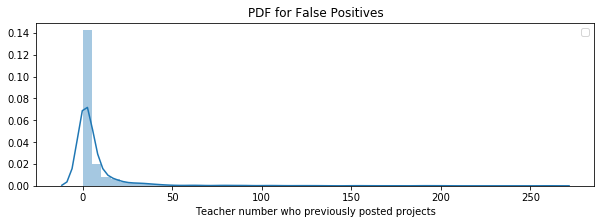

In [77]:
plotPDF(FP_previous_posted_test_3)

<h1>2. Summary</h1>

In [67]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

table.add_row(["TFIDF", "Decision Tree", best_max_depth, test_auc_tfidf])
table.add_row(["TFIDF_W2V", "Decision Tree", best_max_depth_w2v, test_auc_tfidf_w2v])

print (table)

+------------+---------------+-----------------+--------------------+
| Vectorizer |     Model     | Hyper Parameter |        AUC         |
+------------+---------------+-----------------+--------------------+
|   TFIDF    | Decision Tree |        10       | 0.6178854296851309 |
| TFIDF_W2V  | Decision Tree |        5        | 0.613372252656408  |
+------------+---------------+-----------------+--------------------+
